In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import sidetable

In [4]:
df = pd.read_csv('Placement_Data_Full_Class.csv', index_col='sl_no')
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.shape

(215, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [18]:
df.stb.missing()

,missing,total,percent
salary,67,215,31.162791
gender,0,215,0.000000
ssc_p,0,215,0.000000
ssc_b,0,215,0.000000
hsc_p,0,215,0.000000
hsc_b,0,215,0.000000
hsc_s,0,215,0.000000
degree_p,0,215,0.000000
degree_t,0,215,0.000000
workex,0,215,0.000000


In [22]:
df.stb.freq(['salary']).head()#.sort_values('salary', ascending=False)

,salary,count,percent,cumulative_count,cumulative_percent
0,300000.0,22,14.864865,22,14.864865
1,250000.0,18,12.162162,40,27.027027
2,240000.0,15,10.135135,55,37.162162
3,260000.0,7,4.729730,62,41.891892
4,360000.0,6,4.054054,68,45.945946


In [24]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


<AxesSubplot:ylabel='salary'>

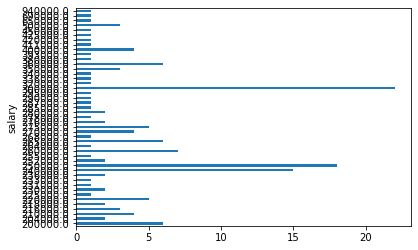

In [33]:
result = df.groupby('salary')['status'].count()
result.plot(kind='barh')

<AxesSubplot:xlabel='degree_t', ylabel='count'>

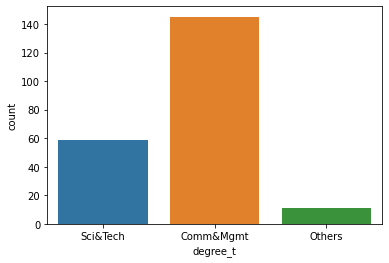

In [40]:
sns.countplot(df['degree_t'])

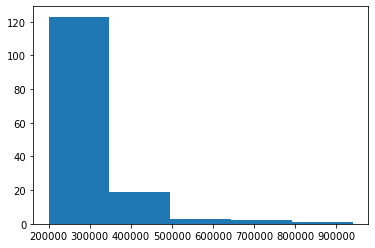

In [47]:
plt.hist(df['salary'], bins=5)
plt.show()

<AxesSubplot:xlabel='ssc_p'>

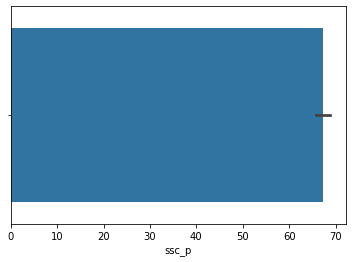

In [49]:
sns.barplot(df['ssc_p'])

<AxesSubplot:xlabel='ssc_p', ylabel='Density'>

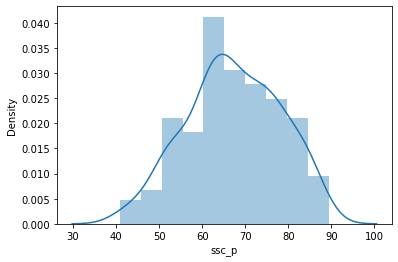

In [51]:
sns.distplot(df['ssc_p'])

In [58]:
sns.displot(df[df.describe().T.index.to_list()])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000210AA2264C0> (for post_execute):


KeyboardInterrupt: 

In [57]:
df.describe().T.index.to_list()

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

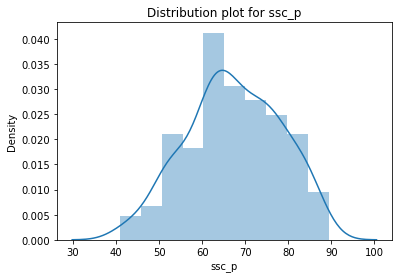

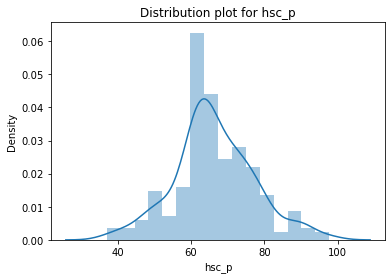

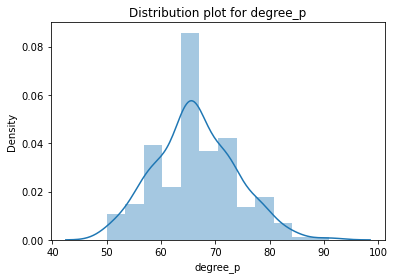

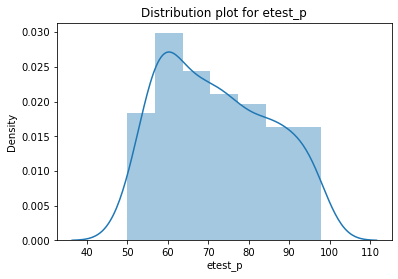

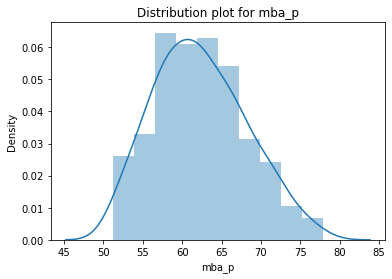

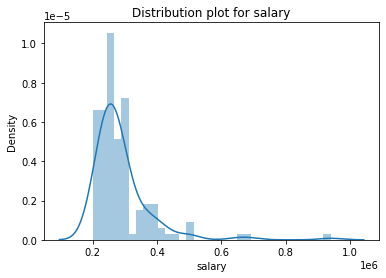

In [71]:
plt.tight_layout()
for col in df.select_dtypes(exclude='object'):
    sns.distplot(df[col])
    plt.title(f'Distribution plot for {col}')
    plt.show()

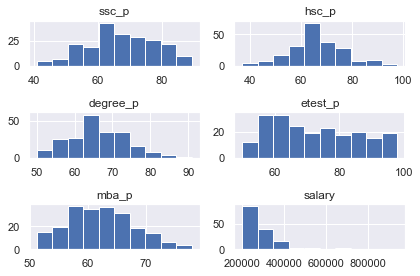

In [78]:
sns.set()
df.hist()
plt.tight_layout()
plt.show()

In [80]:
df['status'].value_counts(normalize=True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

In [84]:
df.stb.freq(cols=['status'])

,status,count,percent,cumulative_count,cumulative_percent
0,Placed,148,68.837209,148,68.837209
1,Not Placed,67,31.162791,215,100.000000


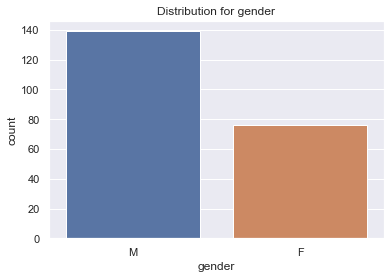

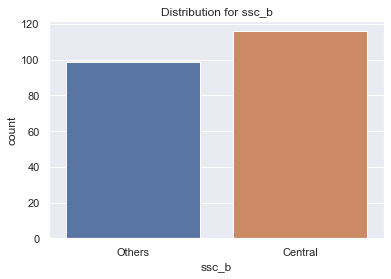

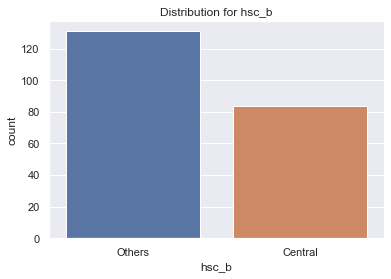

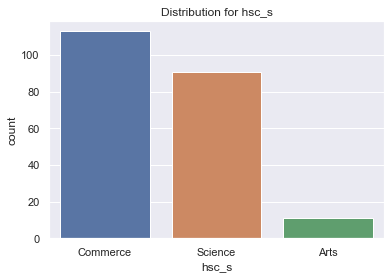

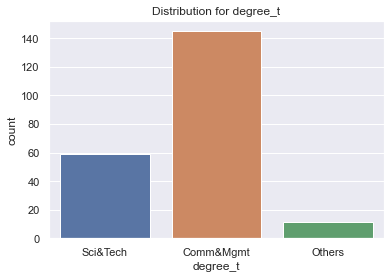

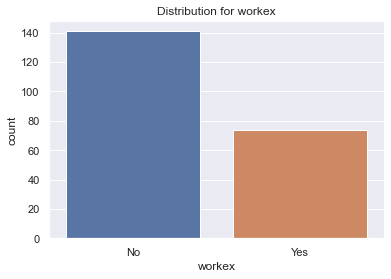

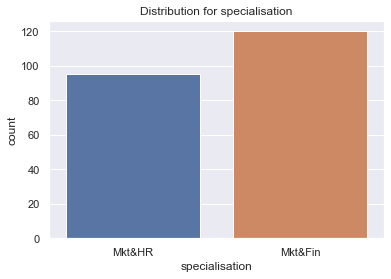

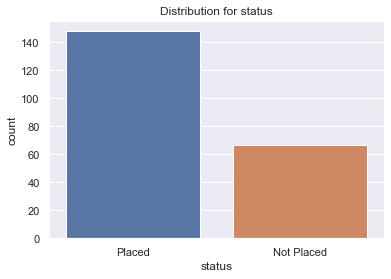

In [88]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(df[col],label='Count')
    plt.title(f'Distribution for {col}')
    plt.show()